In [48]:
import pandas as pd
from pymongo import MongoClient
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats  
import numpy as np
from sklearn.cluster import KMeans

/usr/lib/python3.4/importlib/_bootstrap.py:321: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.4/importlib/_bootstrap.py:321: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
conn = MongoClient('140.115.53.147', 27017)
conn.database_names()

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: database_names is deprecated. Use list_database_names instead.
  


['1031SP',
 '1041SP',
 '1042OS',
 '1051SP',
 '1052OS',
 'KU_dataset_1',
 'KU_dataset_2',
 'NCUx107_Pre_college_calculas',
 'OULAD',
 'admin',
 'chka',
 'chkb',
 'config',
 'ets',
 'local',
 'test']

# NCUx

### NCUx - Freshman calculas

In [3]:
db = conn['ets']
collection = db['ets_final_score.json']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,final_score,username
0,5ba22b0298d846d7943bf7b9,24.5,104602004
1,5ba22b0298d846d7943bf7ba,74.12,104602005
2,5ba22b0298d846d7943bf7bb,61.13,104602006


In [4]:
score_df = df['final_score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ncux_fc = score_df.astype(int)

In [5]:
print('kurtosis=', kurtosis(ncux_fc))
print('skew=', skew(ncux_fc))

kurtosis= 0.6562621629633147
skew= -0.5496566989303352


### NCUx - chka

In [6]:
db = conn['chka']
collection = db['chka_final_score.json']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,final_score,username
0,5ba22b0098d846d7943bea8d,20,Y1050166
1,5ba22b0098d846d7943bea8e,30,Y1050167
2,5ba22b0098d846d7943bea8f,10,Y1050168


In [7]:
score_df = df['final_score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ncux_chka = score_df.astype(int)

### NCUx - chkb

In [8]:
db = conn['chkb']
collection = db['chkb_final_score.json']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,final_score,username
0,5ba22b0198d846d7943bf1ad,10,Y1050281
1,5ba22b0198d846d7943bf1ae,10,Y1050282
2,5ba22b0198d846d7943bf1af,20,Y1050283


In [9]:
score_df = df['final_score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ncux_chkb = score_df.astype(int)

# CYCU

### CYCU 1041SP

In [10]:
db = conn['1041SP']
collection = db['1042aOS2.json']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,MOOCs修課及格,_id,上機次數,上課問答,原始總分,學號,最終成績,期中考,期末考,第一支程式,第一次小考,第三支程式,第三次小考,第二支程式,第二次小考,第四次小考,線上成績,線上表現
0,None,5ba22af298d846d7943ac506,2,100,51.25,10115240,75,88,20,98,92,0,85,0,89,56,86.8,87.00
1,None,5ba22af298d846d7943ac507,2,100,56.10,10220127,74,60,40,98,72,0,58,89,76,36,44.6,71.76
2,None,5ba22af298d846d7943ac508,2,0,5.45,10220120,12,3,0,0,44,0,0,0,47,0,24.0,42.23


In [11]:
score_df = df['線上成績']
score_df = score_df.dropna()
score_df = score_df.astype(float)
cycu_1041sp = score_df.astype(int)

### CYCU 1051SP

In [12]:
db = conn['1051SP']
collection = db['1051aSP_grades.json']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,學年,學號,小考,期中考,期末小考,第一章作業,第一章測驗,第七章作業,第七章測驗,...,第八章測驗,第六章作業,第六章測驗,第四章作業,第四章測驗,系級,總分,選擇題小考一,選擇題小考二,開課代碼
0,5ba22af798d846d7943b1a15,1051,10124341,NaN,NaN,40.0,100.0,80.0,NaN,40.0,...,90.0,NaN,30.0,0.0,NaN,資訊四甲,9.6,NaN,32.0,CS207G
1,5ba22af798d846d7943b1a16,1051,10227129,NaN,NaN,0.0,NaN,NaN,NaN,50.0,...,100.0,NaN,NaN,NaN,NaN,資訊工程學系,7.0,52.0,52.0,CS207G
2,5ba22af798d846d7943b1a17,1051,10227118,80.0,90.0,NaN,NaN,40.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,資訊四甲,17.8,NaN,NaN,CS207G


In [13]:
score_df = df['總分']
score_df = score_df.dropna()
score_df = score_df.astype(float)
cycu_1051sp = score_df.astype(int)

### CYCU 1042OS

In [21]:
db = conn['1042OS']
collection = db['1042aOS_grades.json']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,備註,學年,學號,期中考,期末考,第一次選擇題小考,第一章作業,第一章測驗,第七章作業,...,第十二章作業,第十二章測驗,第十章作業,第十章測驗,第四次選擇題小考,第四章作業,第四章測驗,系級,總分,開課代碼
0,5ba22af398d846d7943ac628,None,1042,9924137,40.0,NaN,8.0,100.0,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,90.0,NaN,工業與系統工程學系,9.5,CS208G
1,5ba22af398d846d7943ac629,None,1042,10220127,NaN,NaN,68.0,100.0,60.0,100.0,...,NaN,NaN,NaN,NaN,NaN,100.0,NaN,電機資訊學院學士班,22.3,CS208G
2,5ba22af398d846d7943ac62a,None,1042,10220140,40.0,65.0,80.0,100.0,70.0,NaN,...,NaN,60.0,100.0,80.0,48.0,100.0,60.0,電機資訊學院學士班,30.0,CS208G


In [22]:
score_df = df['總分']
score_df = score_df.dropna()
score_df = score_df.astype(float)
cycu_1042os = score_df.astype(int)

### CYCU 1052OS

In [14]:
db = conn['1052OS']
collection = db['1052aOS_grades.json']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,備註,學年,學號,期中考,期末考,第一次選擇題小考,第一章作業,第一章測驗,第七章作業,...,第十二章作業,第十二章測驗,第十章作業,第十章測驗,第四次選擇題小考,第四章作業,第四章測驗,系級,總分,開課代碼
0,5ba22afb98d846d7943b5d94,None,1052,3102535,55.0,85.0,NaN,100.0,50.0,NaN,...,100.0,80.0,100.0,80.0,64.0,100.0,90.0,選讀生,35.5,CS208G
1,5ba22afb98d846d7943b5d95,None,1052,10227110,100.0,100.0,100.0,100.0,80.0,100.0,...,100.0,100.0,100.0,80.0,100.0,100.0,80.0,資訊工程學系,47.3,CS208G
2,5ba22afb98d846d7943b5d96,None,1052,10227118,NaN,NaN,NaN,NaN,50.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,資訊四甲,0.5,CS208G


In [15]:
score_df = df['總分']
score_df = score_df.dropna()
score_df = score_df.astype(float)
cycu_1052os = score_df.astype(int)

# KU

### KU BR01

In [16]:
db = conn['KU_dataset_1']
collection = db['data1_score.csv']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,score,userid
0,5ba2041898d846d794395461,80,ds101
1,5ba2041898d846d794395462,80,ds102
2,5ba2041898d846d794395463,60,ds103


In [17]:
score_df = df['score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ku_br01 = score_df.astype(int)

### KU BR02

In [18]:
db = conn['KU_dataset_2']
collection = db['data2_score.csv']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,score,userid
0,5ba2041a98d846d79439e577,100.0,ds201
1,5ba2041a98d846d79439e578,62.5,ds202
2,5ba2041a98d846d79439e579,87.5,ds203


In [19]:
score_df = df['score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ku_br02 = score_df.astype(int)

# Visualization

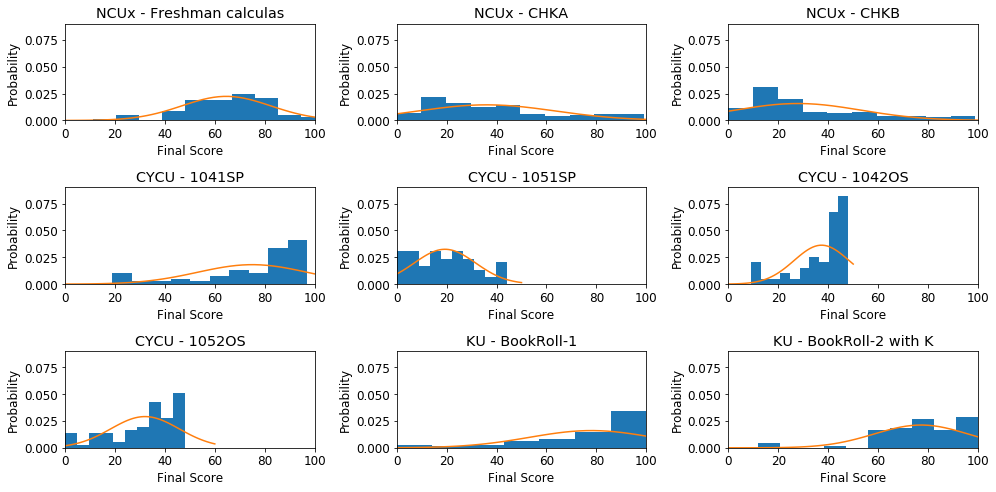

In [61]:
matplotlib.rcParams.update({'font.size': 12})

plt.figure(figsize=(14, 7))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

label = ['Validation', 'Testing']
bins = 10
ylimit = 0.09

plt.subplot(3, 3, 1)
plt.hist(ncux_fc, bins = bins, density=True)
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ncux_fc))
m, s = stats.norm.fit(ncux_fc) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
plt.title('NCUx - Freshman calculas')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)
#plt.legend(['Training', 'Testing'])

plt.subplot(3, 3, 2)
plt.hist(ncux_chka, bins = bins, density=True)
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ncux_chka))
m, s = stats.norm.fit(ncux_chka) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
plt.title('NCUx - CHKA')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)

plt.subplot(3, 3, 3)
plt.hist(ncux_chkb, bins = bins, density=True)
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ncux_chkb))
m, s = stats.norm.fit(ncux_chkb) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
plt.title('NCUx - CHKB')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)

plt.subplot(3, 3, 4)
plt.hist(cycu_1041sp, bins = bins, density=True)
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(cycu_1041sp))
m, s = stats.norm.fit(cycu_1041sp) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
plt.title('CYCU - 1041SP')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)

plt.subplot(3, 3, 5)
plt.hist(cycu_1051sp, bins = bins, density=True)
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(cycu_1051sp))
m, s = stats.norm.fit(cycu_1051sp) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
plt.title('CYCU - 1051SP')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)



plt.subplot(3, 3, 6)
plt.hist(cycu_1042os, bins = bins, density=True)
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(cycu_1042os))
m, s = stats.norm.fit(cycu_1042os) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
plt.title('CYCU - 1042OS')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)




plt.subplot(3, 3, 7)
plt.hist(cycu_1052os, bins = bins, density=True)
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(cycu_1052os))
m, s = stats.norm.fit(cycu_1052os) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
plt.title('CYCU - 1052OS')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)




plt.subplot(3, 3, 8)
plt.hist(ku_br01, bins = 7, density=True)
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ku_br01))
m, s = stats.norm.fit(ku_br01) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
plt.title('KU - BookRoll-1')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)





plt.subplot(3, 3, 9)
plt.hist(ku_br02, bins = bins, density=True)
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ku_br02))
m, s = stats.norm.fit(ku_br02) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
plt.title('KU - BookRoll-2 with K')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)



plt.tight_layout()
plt.savefig('./images/score_distribution.png', dpi=300)

#plt.show()

In [53]:
max(xt)

120.0

In [81]:
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, 1000)

m, s = stats.norm.fit(ncux_fc)  
pdf_g_ncux_fc = stats.norm.pdf(lnspc, m, s) 
m, s = stats.norm.fit(ncux_chka)  
pdf_g_ncux_chka = stats.norm.pdf(lnspc, m, s) 
m, s = stats.norm.fit(ncux_chkb)  
pdf_g_ncux_chkb = stats.norm.pdf(lnspc, m, s) 

m, s = stats.norm.fit(cycu_1041sp)  
pdf_g_cycu_1041sp = stats.norm.pdf(lnspc, m, s) 
m, s = stats.norm.fit(cycu_1051sp)  
pdf_g_cycu_1051sp = stats.norm.pdf(lnspc, m, s) 
m, s = stats.norm.fit(cycu_1042os)  
pdf_g_cycu_1042os = stats.norm.pdf(lnspc, m, s) 
m, s = stats.norm.fit(cycu_1052os)  
pdf_g_cycu_1052os = stats.norm.pdf(lnspc, m, s) 

m, s = stats.norm.fit(ku_br01)  
pdf_g_ku01 = stats.norm.pdf(lnspc, m, s) 
m, s = stats.norm.fit(ku_br02)  
pdf_g_ku02 = stats.norm.pdf(lnspc, m, s)

In [88]:
X = np.array([pdf_g_ncux_fc, 
              pdf_g_ncux_chka, 
              pdf_g_ncux_chkb, 
              pdf_g_cycu_1041sp,
              pdf_g_cycu_1051sp,
              pdf_g_cycu_1042os,
              pdf_g_cycu_1052os,
              pdf_g_ku01, 
              pdf_g_ku02])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [89]:
kmeans.labels_

array([1, 2, 2, 1, 2, 0, 0, 1, 1], dtype=int32)

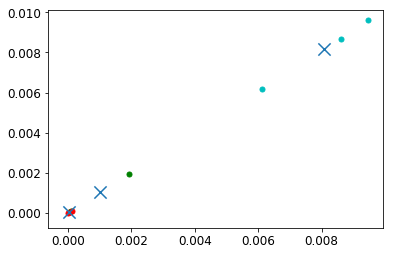

In [90]:
colors = ["g.","r.", "c."]

for i in range(len(X)):
    #print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()